# Advanced: Distribution Types

## Setup

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

In [2]:
import phoebe
from phoebe import u # units
import numpy as np

logger = phoebe.logger()

In [3]:
b = phoebe.default_binary()

## Top-level distl distribution creation functions 

PHOEBE includes [distl](https://distl.readthedocs.io) as a built-in dependency to handle creating and manipulating distribution objects.  The following distribution creation-functions are available from the top-level of PHOEBE (i.e. distributions are created by calling `phoebe.gaussian(...)`, etc):

* [gaussian](../api/phoebe.gaussian.md)
* [gaussian_around](../api/phoebe.gaussian_around.md)
* [histogram_from_bins](../api/phoebe.histogram_from_bins.md)
* [histogram_from_data](../api/phoebe.histogram_from_data.md)
* [mvgaussian](../api/phoebe.mvgaussian.md)
* [mvhistogram_from_data](../api/phoebe.mvhistogram_from_data.md)
* [uniform](../api/phoebe.uniform.md)
* [uniform_around](../api/phoebe.uniform_around.md)

The distinction between `gaussian` and `gaussian_around` as well as `uniform` and `uniform_around` will be discussed in more detail in the next section.  Following that, multivariate distributions (those starting with `mv`) will be introduced.

To see the arguments to any of these creation functions, follow the links above to the respective API docs, or call help on the method.

In [4]:
help(phoebe.gaussian)

Help on function gaussian in module phoebe.dependencies.distl:

gaussian(loc=0.0, scale=1.0, unit=None, label=None, label_latex=None, wrap_at=None)
    This is an included dependency from [distl](https://distl.readthedocs.io).
    
    
    
    Create a Gaussian distribution.
    
    Arguments
    --------------
    * `loc` (float or int, default=0.0): the central value of the gaussian distribution.
    * `scale` (float or int, default=1.0): the scale (sigma) of the gaussian distribution.
    * `unit` (astropy.units object, optional): the units of the provided values.
    * `label` (string, optional): a label for the distribution.  This is used
    for the x-label while plotting the distribution if `label_latex` is not provided,
    as well as a shorthand notation when creating a Composite distribution.
    * `label_latex` (string, optional): a latex label for the distribution.  This is used
    for the x-label while plotting.
    * `wrap_at` (float or False or None, optional, defaul

Note that, when passing a distribution object to [b.add_distribution](../api/phoebe.frontend.bundle.Bundle.add_distribution.md), the values of `unit`, `label`, `label_latex`, and `wrap_at` will be handled by PHOEBE itself - based on the parameter to which the distribution is attached.

To learn more about manipulating distribution objects before calling [b.add_distribution](../api/phoebe.frontend.bundle.Bundle.add_distribution.md), see the [distl docs](https://distl.readthedocs.io/en/latest/).

Let's create a distl gaussian distribution and then attach it to a parameter in PHOEBE.

In [5]:
dist = phoebe.gaussian(6000, 100)

In [6]:
print(dist)

<distl.gaussian loc=6000.0 scale=100.0>


Note that since we didn't provide `label` or `unit`, those will be missing when plotting the distribution object.

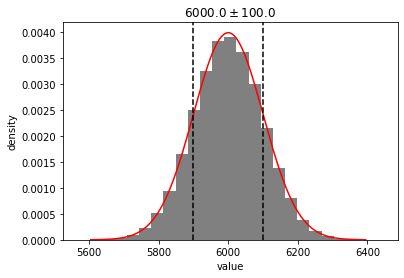

In [7]:
_ = dist.plot(show=True)

However, [b.add_distribution](../api/phoebe.frontend.bundle.Bundle.add_distribution.md) will populate `unit` and `wrap_at` (when applicable):

In [8]:
b.add_distribution('teff@primary', dist, distribution='mydist')

<ParameterSet: 1 parameters>

In [9]:
b.get_value(qualifier='teff', component='primary', distribution='mydist')

<distl.gaussian loc=6000.0 scale=100.0 unit=K>

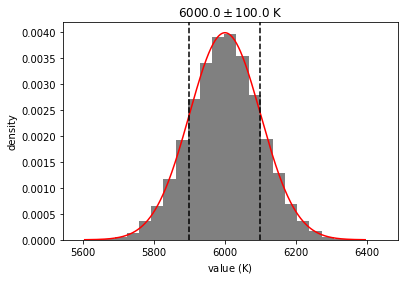

In [10]:
_ = b.get_value(qualifier='teff', component='primary', distribution='mydist').plot(show=True)

And whenever plotting through [b.plot_distribution_collection](../api/phoebe.frontend.bundle.Bundle.plot_distribution_collection.md) or [b.plot](../api/phoebe.parameters.ParameterSet.plot.md), the [latex representation](./latex_repr.md) of the respective parameters will be included.

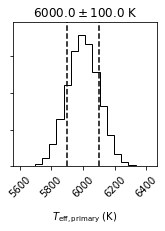

In [11]:
_ = b.plot_distribution_collection(distribution='mydist')

## "Around" distributions

If we look at the API docs for [gaussian](../api/phoebe.gaussian.md) and [gaussian_around](../api/phoebe.gaussian_around.md), we'll notice that they're essentially the same, except that [gaussian_around](../api/phoebe.gaussian_around.md) does not require the first `loc` argument.

In [12]:
help(phoebe.gaussian)

Help on function gaussian in module phoebe.dependencies.distl:

gaussian(loc=0.0, scale=1.0, unit=None, label=None, label_latex=None, wrap_at=None)
    This is an included dependency from [distl](https://distl.readthedocs.io).
    
    
    
    Create a Gaussian distribution.
    
    Arguments
    --------------
    * `loc` (float or int, default=0.0): the central value of the gaussian distribution.
    * `scale` (float or int, default=1.0): the scale (sigma) of the gaussian distribution.
    * `unit` (astropy.units object, optional): the units of the provided values.
    * `label` (string, optional): a label for the distribution.  This is used
    for the x-label while plotting the distribution if `label_latex` is not provided,
    as well as a shorthand notation when creating a Composite distribution.
    * `label_latex` (string, optional): a latex label for the distribution.  This is used
    for the x-label while plotting.
    * `wrap_at` (float or False or None, optional, defaul

In [13]:
help(phoebe.gaussian_around)

Help on function gaussian_around in module phoebe.dependencies.distl:

gaussian_around(scale, value=None, unit=None, label=None, label_latex=None, wrap_at=None)
    This is an included dependency from [distl](https://distl.readthedocs.io).
    
    
    
    Create a Gaussian_Around object which, when called, will resolve
    to a Gaussian object around a given central value.
    
    Arguments
    --------------
    * `scale` (float or int, default=1.0): the scale (sigma) of the gaussian
    distribution.
    * `value` (float, optional, default=None): the current face-value.
    * `unit` (astropy.units object, optional): the units of the provided values.
    * `label` (string, optional): a label for the distribution.  This is used
    for the x-label while plotting the distribution if `label_latex` is not provided,
    as well as a shorthand notation when creating a Composite distribution.
    * `label_latex` (string, optional): a latex label for the distribution.  This is used
    fo

When attached in PHOEBE, any "around" distribution will have its central value updated to always be that of the current parameter value to which its attached.  This can be very convenient in some cases (for example, setting `init_from` to always be an N-dimensional Gaussian "ball" around the current values), but in other cases is not appropriate (for `priors`, where any attached distribution should be based on external knowledge or assumptions, and therefore should be fixed and not update with changing parameter values).

Now we'll attach both a gaussian and gaussian_around distribution and see how they behave differently.

In [14]:
b = phoebe.default_binary()
print(b.get_value(qualifier='teff', component='primary'))

6000.0


In [15]:
b.add_distribution('teff@primary', phoebe.gaussian(6000, 100), distribution='gaussian_dist')

<ParameterSet: 1 parameters>

In [16]:
b.add_distribution('teff@primary', phoebe.gaussian_around(100), distribution='gaussian_around_dist')

<ParameterSet: 1 parameters>

Since the central value is currently 6000, these two distributions are currently identical (the `value` in the `gaussian_around` is the current value that will be adopted as `loc` whenever the distribution is actually used).

In [17]:
print(b.filter(context='distribution'))

ParameterSet: 2 parameters
   teff@gaussian_dist@distribu...: <distl.gaussian loc=6000.0 scale=100.0 unit=K>
   teff@gaussian_around_dist@d...: <distl.gaussian_around scale=100.0 value=6000.0 unit=K>


However, if we change the parameter value, we can see that the "around" distribution updates its central value accordingly.

In [18]:
b.set_value('teff', component='primary', context='component', value=6123)

In [19]:
print(b.filter(context='distribution'))

ParameterSet: 2 parameters
   teff@gaussian_dist@distribu...: <distl.gaussian loc=6000.0 scale=100.0 unit=K>
   teff@gaussian_around_dist@d...: <distl.gaussian_around scale=100.0 value=6123.0 unit=K>


Note that if we try to use any distribution-set with an "around" distribution as `priors` in a solver, a warning will be raised (as of PHOEBE 2.3.23).

## Multivariate distributions

Multivariate distributions allow for storing the covariance between the distributions of multiple parameters.  Although the creation functions are exposed at the top-level, these are most seen in PHOEBE after running an MCMC chain.  For more information on manipulating these multivariate posteriors, see [Advanced: Convert Posterior Distributions from EMCEE](./emcee_distributions_convert.ipynb).  

If, however, we had an MCMC chain or wanted to import a published covariance matrix, we could use [mvhistogram_from_data](../api/phoebe.mvhistogram_from_data.md) or [mvgaussian](../api/phoebe.mvgaussian.md), respectively.

In [20]:
help(phoebe.mvhistogram_from_data)

Help on function mvhistogram_from_data in module phoebe.dependencies.distl:

mvhistogram_from_data(data, bins=10, range=None, weights=None, units=None, labels=None, labels_latex=None, wrap_ats=None)
    This is an included dependency from [distl](https://distl.readthedocs.io).
    
    
    
    Create a MVHistogram object from data.
    
    Arguments
    ------------
    * `data` (array): input array of samples.  Passed to
    [np.histogramdd](https://numpy.org/doc/1.18/reference/generated/numpy.histogramdd.html)
    * `bins` (integer or array, optional, default=10): number of bins or
    bin edges.  Passed to [np.histogramdd](https://numpy.org/doc/1.18/reference/generated/numpy.histogramdd.html)
    * `weights` (array, optional, default=None): weights for each entry
    in `data`.  Passed to [np.histogramdd](https://numpy.org/doc/1.18/reference/generated/numpy.histogramdd.html)
    * `units` (list of astropy.units objects, optional): the units of the provided values.
    * `labels` 

In [21]:
help(phoebe.mvgaussian)

Help on function mvgaussian in module phoebe.dependencies.distl:

mvgaussian(mean, cov, allow_singular=False, units=None, labels=None, labels_latex=None, wrap_ats=None)
    This is an included dependency from [distl](https://distl.readthedocs.io).
    
    
    
    Create a MVGaussian distribution.
    
    Arguments
    --------------
    * `mean` (float or int, default=0.0): the central value of the
    multivariate gaussian distribution.
    * `cov` (float or int, default=1.0): the covariance matrix of the multivariate
    gaussian distribution.
    * `allow_singular` (bool, optional, default=False): passed directly to
    scipy (see link above).
    * `units` (list of astropy.units objects, optional): the units of the provided values.
    * `labels` (list of strings, optional): labels for each dimension in the
    distribution.  This is used
    for the x-labels while plotting the distribution when `labels_latex`
    is not provided, as well as a shorthand
    notation when creati

Once we create our single distl multivariate object, we then need to tell PHOEBE which "slices" of that multivariate distribution to attach to which parameters.

Here we will set labels, just to make it easier to track the dimensions of the distribution object.

In [22]:
import numpy as np
b = phoebe.default_binary()

In [23]:
dist = phoebe.mvgaussian([6500, 6200, 0.9], 
                         np.array([[ 2,  1, -1],
                                   [ 1,  2,  1],
                                   [-1,  1,  2]]),
                        allow_singular=True,
                        labels=['T1', 'T2', 'q'])

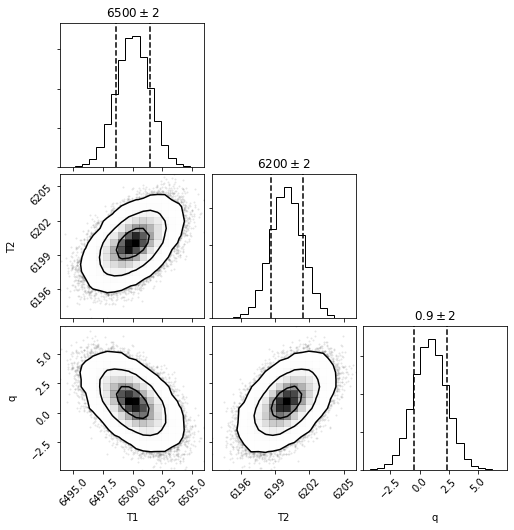

In [24]:
_ = dist.plot(show=True)

By calling [dist.slice](https://distl.readthedocs.io/en/latest/examples/multivariate_slice/), we get a distl object which retains the covariance matrix, but represents a single dimension, which can then be passed to PHOEBE.

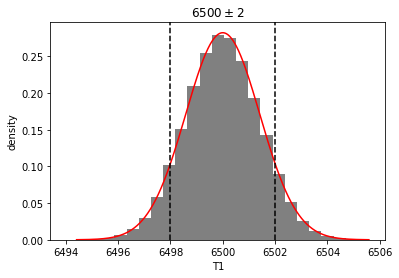

In [25]:
_ = dist.slice('T1').plot()

In [26]:
dist.slice('T1')

<distl.mvgaussianslice dimension=0 mean=[6500, 6200, 0.9] cov=[[ 2  1 -1]
 [ 1  2  1]
 [-1  1  2]] allow_singular=True label=T1)>

In [27]:
b.add_distribution({'teff@primary': dist.slice('T1'),
                    'teff@secondary': dist.slice('T2'),
                     'q': dist.slice('q')},
                    distribution='mydist')

<ParameterSet: 3 parameters | components: binary, primary, secondary>

And we can see that the covariances (although stored three separate times) are maintained whenever sampling from the distributions within PHOEBE.

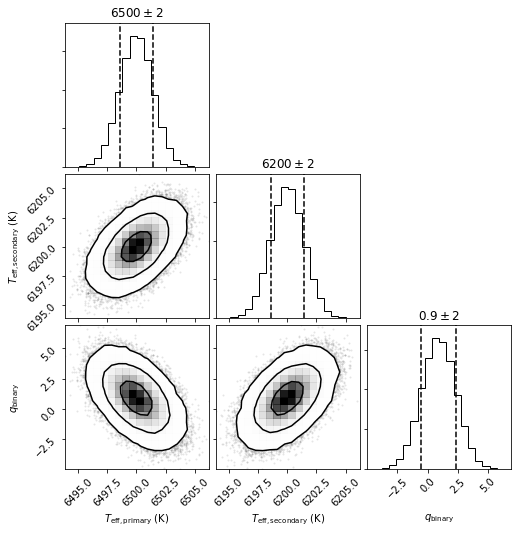

In [28]:
_ = b.plot_distribution_collection('mydist', show=True)